# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [6]:
# Defining the class names found from https://www.cs.toronto.edu/~kriz/cifar.html
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

Training set shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)

Number of classes: 100

Data type: uint8
Min value: 0
Max value: 255

Image dimensions:
Height: 32
Width: 32
Color channels: 3


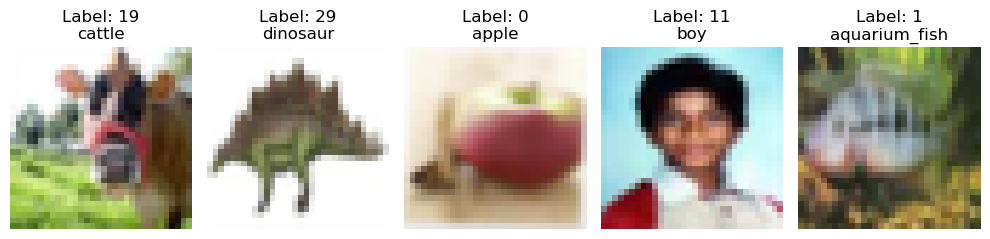

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Print shapes and dimensions
print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Print number of classes
num_classes = len(np.unique(y_train))
print("\nNumber of classes:", num_classes)

# Print data type and value range
print("\nData type:", x_train.dtype)
print("Min value:", x_train.min())
print("Max value:", x_train.max())

# Print image dimensions
print("\nImage dimensions:")
print("Height:", x_train.shape[1])
print("Width:", x_train.shape[2])
print("Color channels:", x_train.shape[3])

# Display some example images with their class names
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    class_idx = y_train[i][0]
    plt.title(f"Label: {class_idx}\n{class_names[class_idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

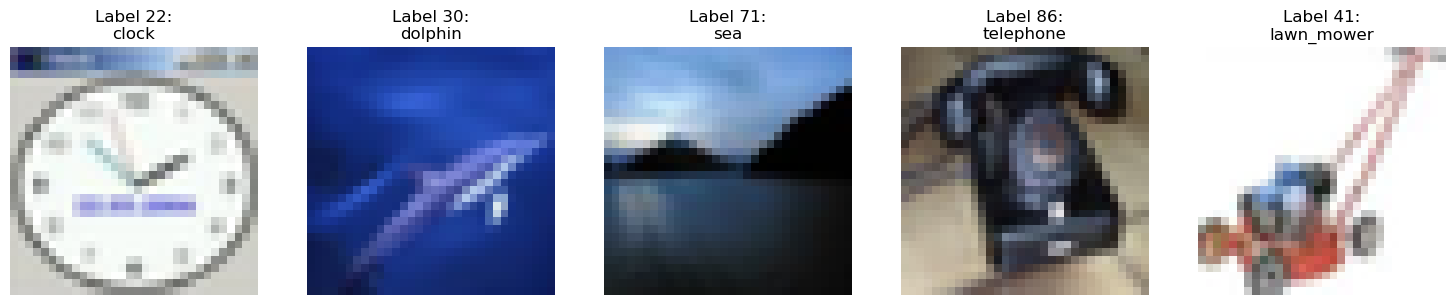

In [7]:
# Checking a few random images and their class names
import random

plt.figure(figsize=(15, 3))
for i in range(5):
    # Pick a random image
    idx = random.randint(0, len(x_train)-1)
    
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[idx])
    label_num = y_train[idx][0]
    plt.title(f"Label {label_num}:\n{class_names[label_num]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [8]:
# 1. Normalize the pixel values to range [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. Convert labels to one-hot encoded vectors
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 100)  # 100 is the number of classes
y_test = to_categorical(y_test, 100)

# 3. Split training data into training and validation sets
from sklearn.model_selection import train_test_split

# Split with 20% validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, 
    test_size=0.2,    # 20% for validation
    random_state=42   # for reproducibility
)

# Print shapes to verify
print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Test set shape:", x_test.shape)

Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a simple CNN model
model = Sequential([
    # First convolutional layer with custom filter size and padding
    Conv2D(32, kernel_size=(5, 5),        # larger filter size (5x5)
           padding='same',                 # adding padding
           activation='relu', 
           input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  # custom strides
    
    # Second convolutional layer with different parameters
    Conv2D(64, kernel_size=(3, 3),        # different filter size (3x3)
           padding='valid',                # no padding
           activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten layer
    Flatten(),
    
    # Dense layers
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')       # 100 classes output
])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [10]:
from keras import optimizers

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Loss function: Categorical Crossentropy

It is great for the CIFAR-100 task because it helps the model learn to classify images into one of 100 categories. It compares the true labels (in a format where only the correct class is marked) with the model's predictions and adjusts to make the predictions closer to the correct label. It is penalizing incorrect predictions while rewarding confidence in the correct class.

Optimizer: Adam

Adam is a popular method for training neural networks because it automatically adjusts the learning rate as training progresses, saving time and effort in fine-tuning. It combines techniques to make learning faster and more stable, and it works well for many different tasks and datasets.

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [11]:
# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=20,                # We'll start with 20 epochs
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/20
1250/1250 [==============================] - 69s 55ms/step - loss: 3.7963 - accuracy: 0.1269 - val_loss: 3.3059 - val_accuracy: 0.2087
Epoch 2/20
1250/1250 [==============================] - 70s 56ms/step - loss: 3.0489 - accuracy: 0.2559 - val_loss: 2.9640 - val_accuracy: 0.2825
Epoch 3/20
1250/1250 [==============================] - 71s 57ms/step - loss: 2.7076 - accuracy: 0.3223 - val_loss: 2.7737 - val_accuracy: 0.3126
Epoch 4/20
1250/1250 [==============================] - 72s 58ms/step - loss: 2.4551 - accuracy: 0.3717 - val_loss: 2.7154 - val_accuracy: 0.3278
Epoch 5/20
1250/1250 [==============================] - 74s 59ms/step - loss: 2.2621 - accuracy: 0.4117 - val_loss: 2.6701 - val_accuracy: 0.3410
Epoch 6/20
1250/1250 [==============================] - 74s 59ms/step - loss: 2.0926 - accuracy: 0.4508 - val_loss: 2.6681 - val_accuracy: 0.3505
Epoch 7/20
1250/1250 [==============================] - 75s 60ms/step - loss: 1.9475 - accuracy: 0.4805 - val_loss: 2.7255 -

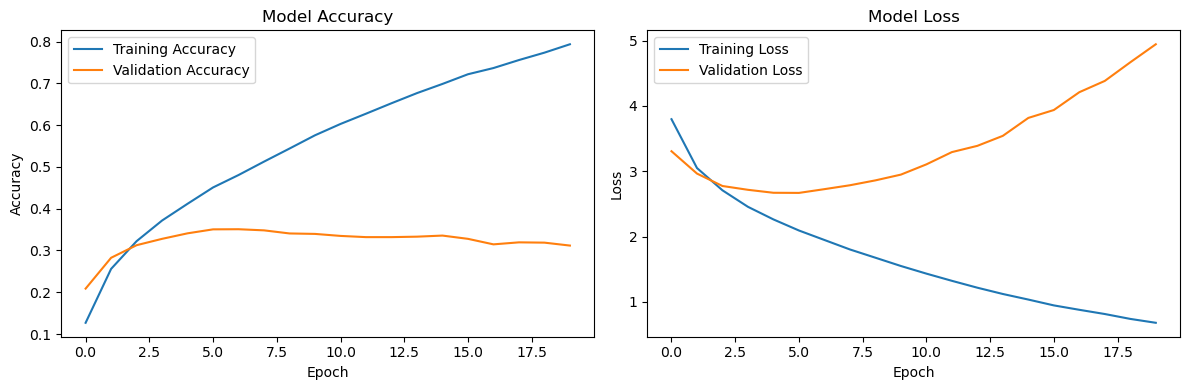

In [12]:
# Plot training history
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

The accuracy and loss plots show that the model initially improves well, with training accuracy steadily increasing and validation accuracy peaking at around 35% by epochs 6-7. However, after this point, validation accuracy starts to drop, and the gap between training and validation performance grows, signaling overfitting. This means the model is memorizing the training data instead of learning general patterns, and training should have stopped earlier, around epoch 7.

Using epoch 7:

In [16]:
# 1. Recreate the model
model = Sequential([
    Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu', 
           input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
])

# 2. Recompile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 3. Train the fresh model
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=7,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/7
1250/1250 [==============================] - 66s 52ms/step - loss: 3.8299 - accuracy: 0.1206 - val_loss: 3.3787 - val_accuracy: 0.1961
Epoch 2/7
1250/1250 [==============================] - 85s 68ms/step - loss: 3.0943 - accuracy: 0.2465 - val_loss: 2.9737 - val_accuracy: 0.2687
Epoch 3/7
1250/1250 [==============================] - 86s 69ms/step - loss: 2.7375 - accuracy: 0.3155 - val_loss: 2.7837 - val_accuracy: 0.3143
Epoch 4/7
1250/1250 [==============================] - 81s 65ms/step - loss: 2.4933 - accuracy: 0.3620 - val_loss: 2.7171 - val_accuracy: 0.3275
Epoch 5/7
1250/1250 [==============================] - 84s 67ms/step - loss: 2.3049 - accuracy: 0.4028 - val_loss: 2.6397 - val_accuracy: 0.3450
Epoch 6/7
1250/1250 [==============================] - 84s 67ms/step - loss: 2.1468 - accuracy: 0.4376 - val_loss: 2.6968 - val_accuracy: 0.3460
Epoch 7/7
1250/1250 [==============================] - 85s 68ms/step - loss: 1.9991 - accuracy: 0.4693 - val_loss: 2.6671 - val_ac

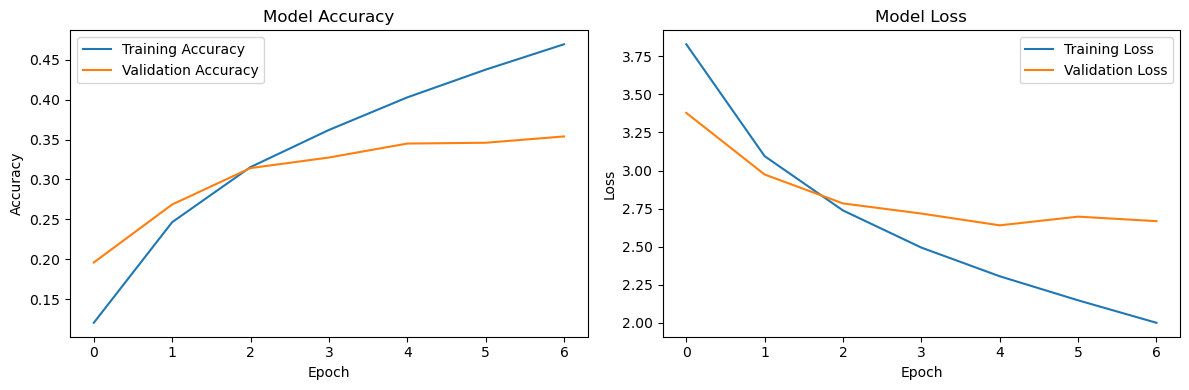

In [17]:
# Plot training history
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

The accuracy and loss plots show steady improvement for both training and validation, with training accuracy increasing from 12% to 47% and validation accuracy from 20% to 35%. The training and validation loss decrease without significant divergence, indicating no severe overfitting and confirming that 7 epochs was an appropriate choice, as the validation metrics were still improving by the end.

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [19]:
# Your code here

In [18]:
# Evaluate model on test set
from sklearn.metrics import accuracy_score, precision_score

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
test_accuracy = accuracy_score(y_test_classes, y_pred_classes)

# Calculate precision (macro average for multi-class)
test_precision = precision_score(y_test_classes, y_pred_classes, average='macro')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")

313/313 [==============================] - 3s 9ms/step
Test Accuracy: 0.3615
Test Precision: 0.3798


Accuracy: 36.15% 

Our model correctly classifies about 36% of all test images

Other metric: Precision (Macro-averaged)

Reason for selection: Precision is particularly useful for multi-class classification as it measures how accurate our positive predictions are for each class. The macro-average gives equal weight to each class, which is important since our dataset has the same number of images per class.


Value of metric: 37.98%

When the model predicts a specific class, it's right about 38% of the time.

Interpretation of metric value: The macro-averaged precision of 37.98% indicates that when our model predicts a specific class, it is correct about 38% of the time, averaged across all 100 classes. This is slightly higher than our accuracy, suggesting that when our model makes a positive prediction for a class, it's slightly more reliable than its overall accuracy would suggest.

The close values between accuracy and precision suggest consistent performance across classes.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

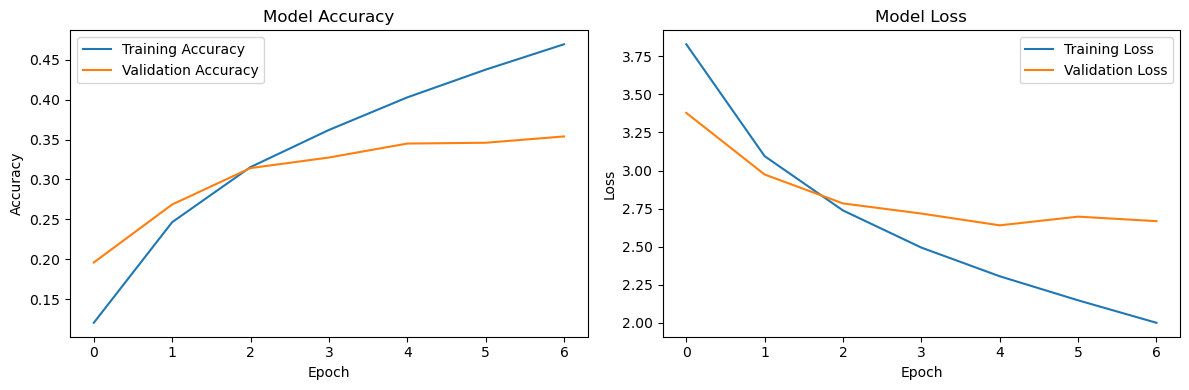

In [20]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 [==============================] - 3s 11ms/step


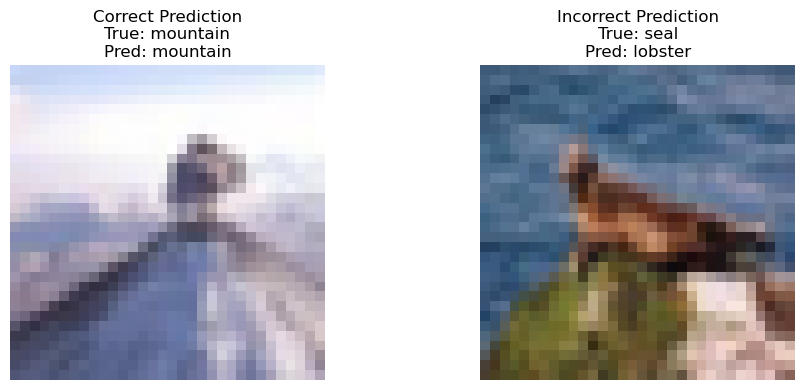


Probabilities for Correct Prediction:
mountain: 22.81%
skyscraper: 18.93%
dolphin: 8.00%

Probabilities for Incorrect Prediction:
lobster: 16.36%
train: 6.60%
beaver: 6.19%


In [21]:
# Get predictions for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Find a correct and incorrect prediction
correct_idx = np.where(y_pred_classes == y_test_classes)[0][0]
incorrect_idx = np.where(y_pred_classes != y_test_classes)[0][0]

# Plot the examples
plt.figure(figsize=(10, 4))

# Correct prediction
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
true_class = class_names[y_test_classes[correct_idx]]
pred_class = class_names[y_pred_classes[correct_idx]]
plt.title(f'Correct Prediction\nTrue: {true_class}\nPred: {pred_class}')
plt.axis('off')

# Incorrect prediction
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
true_class = class_names[y_test_classes[incorrect_idx]]
pred_class = class_names[y_pred_classes[incorrect_idx]]
plt.title(f'Incorrect Prediction\nTrue: {true_class}\nPred: {pred_class}')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print probabilities for these predictions
print("\nProbabilities for Correct Prediction:")
top_3_correct = np.argsort(y_pred[correct_idx])[-3:][::-1]
for idx in top_3_correct:
    print(f"{class_names[idx]}: {y_pred[correct_idx][idx]*100:.2f}%")

print("\nProbabilities for Incorrect Prediction:")
top_3_incorrect = np.argsort(y_pred[incorrect_idx])[-3:][::-1]
for idx in top_3_incorrect:
    print(f"{class_names[idx]}: {y_pred[incorrect_idx][idx]*100:.2f}%")

The training plots and prediction examples reveal several interesting aspects of our model's learning:

1. Training Progress:
   - Training accuracy improves steadily from 12% to 47%
   - Validation accuracy plateaus around 35% after epoch 4
   - The loss curves show consistent improvement without severe overfitting

2. Correct Prediction Example (Mountain):
   - The model correctly identified the mountain image
   - However, the confidence is relatively low at 22.81%
   - The second guess (skyscraper at 18.93%) makes visual sense given the vertical structure
   - Shows the model has learned relevant features but lacks strong confidence

3. Incorrect Prediction Example (Seal vs Lobster):
   - The model misclassified a seal as a lobster with 16.36% confidence
   - The low confidence (16.36%) suggests model uncertainty
   - The confusion is understandable given both are marine animals with similar colors in the image
   - The model's top three guesses all have very low confidence (all under 17%)

These results make sense given the challenging nature of the CIFAR-100 dataset with its 100 classes and small, low-resolution images. The low confidence scores across both correct and incorrect predictions suggest the model recognizes the difficulty of the task.

The training plots and prediction examples reveal several interesting aspects of our model's learning:

1. Learning Progress (from the graphs):
   - The blue line (training accuracy 12% to 47%) shows our model got better at recognizing training images
   - Validation accuracy plateaus around 35% after epoch 4
   - No severe overfitting. Both lines go up and stay fairly close, which is good!

2. Example of Success (Mountain):
   - The model correctly said "this is a mountain"
   - It was 22.81% sure it was a mountain
   - It thought it might be a skyscraper (18.93%) as second choice
   - This makes sense because both are tall and pointy!

3. Example of Mistake (Seal vs Lobster):
   - The model thought a seal was a lobster
   - It wasn't very sure (only 16.36% confident)
   - The mistake is understandable because:
     - Both animals are found in water
     - The image is small and not very clear
     - Both have similar colors in this image

We migght ask why aren't the confidence levels higher? Remember, our model has to choose between 100 different classes - that's a lot of options! Even humans might struggle with some of these tiny, low-quality images. The model is doing a decent job considering how tough this task is.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [21]:
# Your code here

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Add Dropout

# Create model with dropout
model = Sequential([
    # First convolutional layer
    Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu', 
           input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),                # Added dropout: randomly drops 25% of inputs
    
    # Second convolutional layer
    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),                # Added dropout
    
    # Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),                 # Added dropout: 50% for dense layer
    Dense(100, activation='softmax')
])

# Compile the model (same as before)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Epoch 1/7
1250/1250 [==============================] - 76s 61ms/step - loss: 4.2404 - accuracy: 0.0569 - val_loss: 3.7742 - val_accuracy: 0.1395
Epoch 2/7
1250/1250 [==============================] - 75s 60ms/step - loss: 3.7715 - accuracy: 0.1230 - val_loss: 3.4934 - val_accuracy: 0.1926
Epoch 3/7
1250/1250 [==============================] - 75s 60ms/step - loss: 3.5782 - accuracy: 0.1519 - val_loss: 3.3609 - val_accuracy: 0.2111
Epoch 4/7
1250/1250 [==============================] - 77s 62ms/step - loss: 3.4692 - accuracy: 0.1704 - val_loss: 3.2468 - val_accuracy: 0.2357
Epoch 5/7
1250/1250 [==============================] - 75s 60ms/step - loss: 3.3863 - accuracy: 0.1836 - val_loss: 3.1589 - val_accuracy: 0.2547
Epoch 6/7
1250/1250 [==============================] - 75s 60ms/step - loss: 3.3239 - accuracy: 0.1945 - val_loss: 3.1125 - val_accuracy: 0.2565
Epoch 7/7
1250/1250 [==============================] - 76s 61ms/step - loss: 3.2679 - accuracy: 0.2033 - val_loss: 3.0553 - val_ac

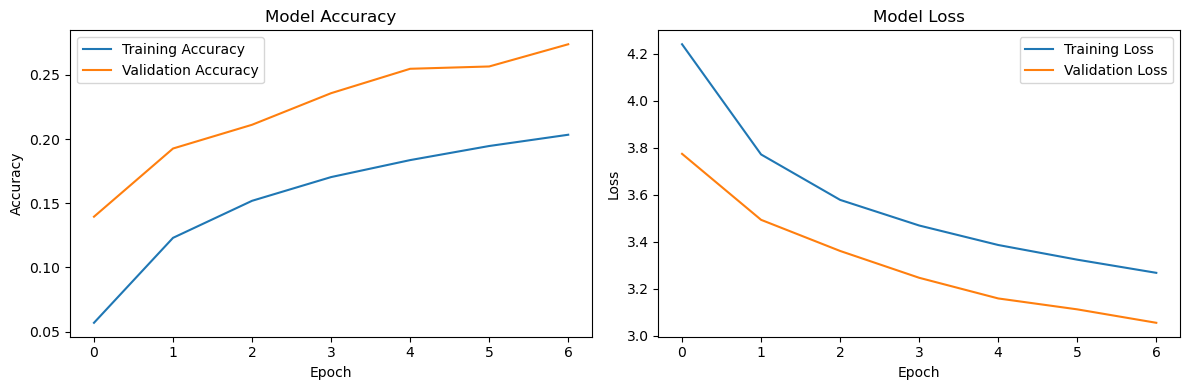

In [24]:
# Train the model with dropout
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=7,
    validation_data=(x_val, y_val),
    verbose=1
)

# Plot the training results
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Reduce Dropout rates:

In [25]:
model = Sequential([
    Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu', 
           input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.1),                # Reduced from 0.25 to 0.1
    
    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),                # Reduced from 0.25 to 0.1
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),                # Reduced from 0.5 to 0.2
    Dense(100, activation='softmax')
])

In [26]:
# Create model with reduced dropout rates
model = Sequential([
    # First convolutional layer
    Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu', 
           input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.1),                # Reduced from 0.25 to 0.1
    
    # Second convolutional layer
    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),                # Reduced from 0.25 to 0.1
    
    # Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),                # Reduced from 0.5 to 0.2
    Dense(100, activation='softmax')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=7,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/7
1250/1250 [==============================] - 73s 58ms/step - loss: 4.0457 - accuracy: 0.0821 - val_loss: 3.5532 - val_accuracy: 0.1664
Epoch 2/7
1250/1250 [==============================] - 65s 52ms/step - loss: 3.4764 - accuracy: 0.1696 - val_loss: 3.1840 - val_accuracy: 0.2336
Epoch 3/7
1250/1250 [==============================] - 77s 62ms/step - loss: 3.2221 - accuracy: 0.2178 - val_loss: 3.0166 - val_accuracy: 0.2688
Epoch 4/7
1250/1250 [==============================] - 77s 62ms/step - loss: 3.0507 - accuracy: 0.2488 - val_loss: 2.9270 - val_accuracy: 0.2850
Epoch 5/7
1250/1250 [==============================] - 63s 50ms/step - loss: 2.9366 - accuracy: 0.2693 - val_loss: 2.7786 - val_accuracy: 0.3094
Epoch 6/7
1250/1250 [==============================] - 75s 60ms/step - loss: 2.8202 - accuracy: 0.2919 - val_loss: 2.7307 - val_accuracy: 0.3172
Epoch 7/7
1250/1250 [==============================] - 73s 59ms/step - loss: 2.7401 - accuracy: 0.3030 - val_loss: 2.7131 - val_ac

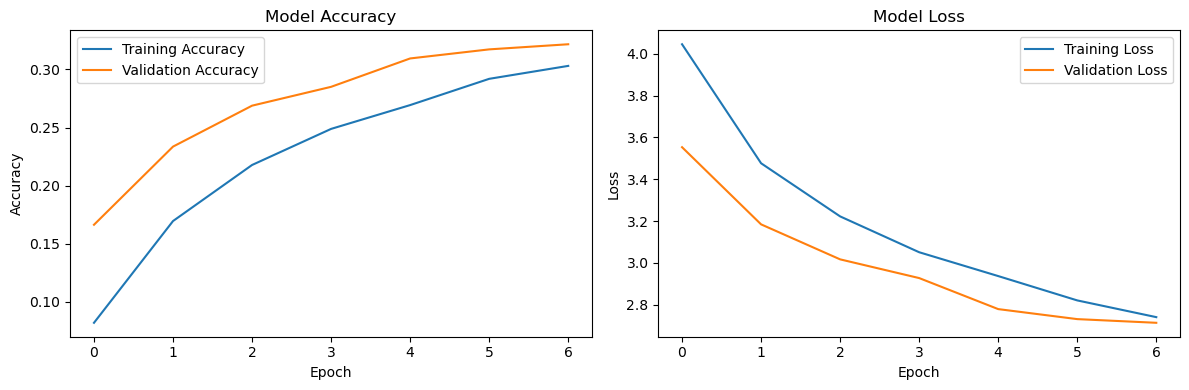

In [27]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [22]:
# Your code here

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.